In [2]:
import findspark
findspark.init()

In [3]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello")

df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [4]:
df = spark.read.csv("nuclear_plants_small_dataset.csv",inferSchema=True,header=True)
df.show()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|        

In [5]:
df.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [7]:
totalentries = df.count()
totalentries


996

In [8]:
from pyspark.sql.functions import isnan, when, count, col

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [9]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|     0|                   0|                   0|                    0|                   0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|                 0|
+------+--------

In [10]:
df.groupBy("Status").mean().show()

+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|  Status|avg(Power_range_sensor_1)|avg(Power_range_sensor_2)|avg(Power_range_sensor_3 )|avg(Power_range_sensor_4)|avg(Pressure _sensor_1)|avg(Pressure _sensor_2)|avg(Pressure _sensor_3)|avg(Pressure _sensor_4)|avg(Vibration_sensor_1)|avg(Vibration_sensor_2)|avg(Vibration_sensor_3)|avg(Vibration_sensor_4)|
+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|Abnormal|        4.396694975903612|        5.914042891566265|         9.164

In [11]:
df.groupBy("Status").min().show()

+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|  Status|min(Power_range_sensor_1)|min(Power_range_sensor_2)|min(Power_range_sensor_3 )|min(Power_range_sensor_4)|min(Pressure _sensor_1)|min(Pressure _sensor_2)|min(Pressure _sensor_3)|min(Pressure _sensor_4)|min(Vibration_sensor_1)|min(Vibration_sensor_2)|min(Vibration_sensor_3)|min(Vibration_sensor_4)|
+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|Abnormal|                   0.0082|                   0.3891|              

In [12]:
df.groupBy("Status").max().show()

+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|  Status|max(Power_range_sensor_1)|max(Power_range_sensor_2)|max(Power_range_sensor_3 )|max(Power_range_sensor_4)|max(Pressure _sensor_1)|max(Pressure _sensor_2)|max(Pressure _sensor_3)|max(Pressure _sensor_4)|max(Vibration_sensor_1)|max(Vibration_sensor_2)|max(Vibration_sensor_3)|max(Vibration_sensor_4)|
+--------+-------------------------+-------------------------+--------------------------+-------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|Abnormal|                10.923078|                  10.1541|              

In [13]:
df2 = pd.read_csv("nuclear_plants_small_dataset.csv")
df2.groupby(['Status']).agg(lambda x:x.value_counts().index[0])

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Status,,,,,,,,,,,,
Abnormal,5.0281,3.2648,12.3029,9.719376,14.1335,0.60843,7.9299,0.8392,3.3418,10.06587,4.2188,14.491548
Normal,4.4284,6.8005,10.5588,8.079500,3.0697,3.11300,5.7394,8.4143,8.8992,4.08040,3.2310,3.766500


In [14]:
df.groupBy("Status").agg({'Power_range_sensor_1':'stddev'}).show()

+--------+----------------------------+
|  Status|stddev(Power_range_sensor_1)|
+--------+----------------------------+
|Abnormal|          2.4902791246752103|
|  Normal|          2.8938476968280042|
+--------+----------------------------+



In [15]:
df.groupBy("Status").agg({'Power_range_sensor_2':'stddev'}).show()

+--------+----------------------------+
|  Status|stddev(Power_range_sensor_2)|
+--------+----------------------------+
|Abnormal|          2.3221603879385753|
|  Normal|          2.2091924318296754|
+--------+----------------------------+



In [16]:
df.groupBy("Status").agg({'Power_range_sensor_3 ':'stddev'}).show()

+--------+-----------------------------+
|  Status|stddev(Power_range_sensor_3 )|
+--------+-----------------------------+
|Abnormal|            2.941907207638418|
|  Normal|           2.0429607681487942|
+--------+-----------------------------+



In [17]:
df.groupBy("Status").agg({'Power_range_sensor_4':'stddev'}).show()

+--------+----------------------------+
|  Status|stddev(Power_range_sensor_4)|
+--------+----------------------------+
|Abnormal|            3.77901397505663|
|  Normal|           4.478168549085763|
+--------+----------------------------+



In [18]:
df.groupBy("Status").agg({'Pressure _sensor_1':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Pressure _sensor_1)|
+--------+--------------------------+
|Abnormal|        11.594206503440402|
|  Normal|        11.763187215747637|
+--------+--------------------------+



In [19]:
df.groupBy("Status").agg({'Pressure _sensor_2':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Pressure _sensor_2)|
+--------+--------------------------+
|Abnormal|         2.003602192756939|
|  Normal|         2.192412604031201|
+--------+--------------------------+



In [20]:
df.groupBy("Status").agg({'Pressure _sensor_3':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Pressure _sensor_3)|
+--------+--------------------------+
|Abnormal|         2.493141936940207|
|  Normal|        2.5493232663633996|
+--------+--------------------------+



In [21]:
df.groupBy("Status").agg({'Pressure _sensor_4':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Pressure _sensor_4)|
+--------+--------------------------+
|Abnormal|         3.958432116092332|
|  Normal|        4.2863366514922685|
+--------+--------------------------+



In [22]:
df.groupBy("Status").agg({'Vibration_sensor_1':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Vibration_sensor_1)|
+--------+--------------------------+
|Abnormal|         6.132977734039759|
|  Normal|         6.207088529719471|
+--------+--------------------------+



In [23]:
df.groupBy("Status").agg({'Vibration_sensor_2':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Vibration_sensor_2)|
+--------+--------------------------+
|Abnormal|           7.6488892147822|
|  Normal|         7.004331303275537|
+--------+--------------------------+



In [24]:
df.groupBy("Status").agg({'Vibration_sensor_3':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Vibration_sensor_3)|
+--------+--------------------------+
|Abnormal|         8.165753868548268|
|  Normal|        13.897346608819056|
+--------+--------------------------+



In [25]:
df.groupBy("Status").agg({'Vibration_sensor_4':'stddev'}).show()

+--------+--------------------------+
|  Status|stddev(Vibration_sensor_4)|
+--------+--------------------------+
|Abnormal|         6.073995607127157|
|  Normal|         8.204228877149035|
+--------+--------------------------+



In [26]:
import pyspark.sql.functions as F
from pyspark.sql.functions import count, col

In [27]:
df.groupby("Status").agg(F.percentile_approx("Power_range_sensor_1", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|4.5053|
|  Normal|5.1727|
+--------+------+



In [28]:
df.groupby("Status").agg(F.percentile_approx("Power_range_sensor_2", 0.5).alias("median")).show()

+--------+--------+
|  Status|  median|
+--------+--------+
|Abnormal|5.929872|
|  Normal|  6.6998|
+--------+--------+



In [29]:
df.groupby("Status").agg(F.percentile_approx("Power_range_sensor_3 ", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|9.4666|
|  Normal|9.2624|
+--------+------+



In [30]:
df.groupby("Status").agg(F.percentile_approx("Power_range_sensor_4", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|5.3952|
|  Normal|9.2404|
+--------+------+



In [31]:
df.groupby("Status").agg(F.percentile_approx("Pressure _sensor_1", 0.5).alias("median")).show()

+--------+-------+
|  Status| median|
+--------+-------+
|Abnormal|12.5912|
|  Normal|10.6274|
+--------+-------+



In [32]:
df.groupby("Status").agg(F.percentile_approx("Pressure _sensor_2", 0.5).alias("median")).show()

+--------+--------+
|  Status|  median|
+--------+--------+
|Abnormal|2.380578|
|  Normal|   3.113|
+--------+--------+



In [33]:
df.groupby("Status").agg(F.percentile_approx("Pressure _sensor_3", 0.5).alias("median")).show()

+--------+--------+
|  Status|  median|
+--------+--------+
|Abnormal|5.743314|
|  Normal|  5.7394|
+--------+--------+



In [34]:
df.groupby("Status").agg(F.percentile_approx("Pressure _sensor_4", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|3.3072|
|  Normal|4.2574|
+--------+------+



In [35]:
df.groupby("Status").agg(F.percentile_approx("Vibration_sensor_1", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|6.5175|
|  Normal|7.4222|
+--------+------+



In [36]:
df.groupby("Status").agg(F.percentile_approx("Vibration_sensor_2", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|8.9085|
|  Normal|8.6684|
+--------+------+



In [37]:
df.groupby("Status").agg(F.percentile_approx("Vibration_sensor_3", 0.5).alias("median")).show()

+--------+--------+
|  Status|  median|
+--------+--------+
|Abnormal|8.983038|
|  Normal| 16.4414|
+--------+--------+



In [38]:
df.groupby("Status").agg(F.percentile_approx("Vibration_sensor_4", 0.5).alias("median")).show()

+--------+------+
|  Status|median|
+--------+------+
|Abnormal|8.1145|
|  Normal|9.4347|
+--------+------+



In [39]:
df2.groupby('Status').var()

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Status,,,,,,,,,,,,
Abnormal,6.201490,5.392429,8.654818,14.280947,134.425624,4.014422,6.215757,15.669185,37.613416,58.505506,66.679536,36.893423
Normal,8.374354,4.880531,4.173689,20.053994,138.372573,4.806673,6.499049,18.372682,38.527948,49.060657,193.136243,67.309371


<AxesSubplot:xlabel='Power_range_sensor_1', ylabel='Status'>

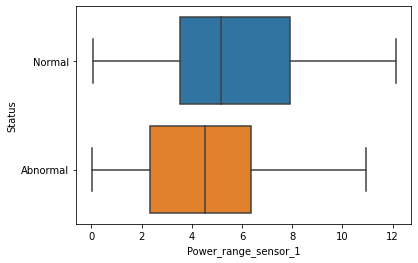

In [40]:
sns.boxplot(x='Power_range_sensor_1', y='Status', data=df2)


<AxesSubplot:xlabel='Power_range_sensor_2', ylabel='Status'>

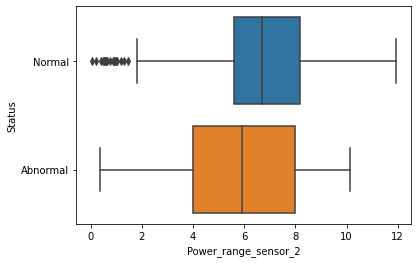

In [41]:
sns.boxplot(x='Power_range_sensor_2', y='Status', data=df2)

<AxesSubplot:xlabel='Power_range_sensor_3 ', ylabel='Status'>

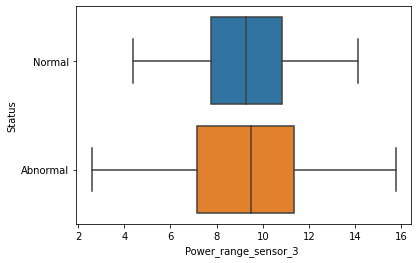

In [42]:
sns.boxplot(x='Power_range_sensor_3 ', y='Status', data=df2)

<AxesSubplot:xlabel='Power_range_sensor_4', ylabel='Status'>

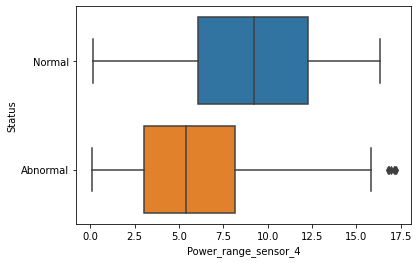

In [43]:
sns.boxplot(x='Power_range_sensor_4', y='Status', data=df2)

<AxesSubplot:xlabel='Pressure _sensor_1', ylabel='Status'>

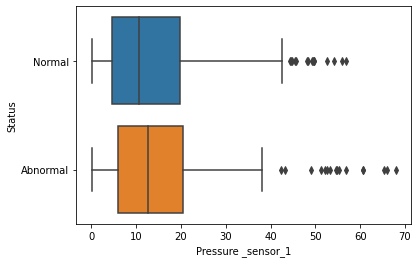

In [44]:
sns.boxplot(x='Pressure _sensor_1', y='Status', data=df2)

<AxesSubplot:xlabel='Pressure _sensor_2', ylabel='Status'>

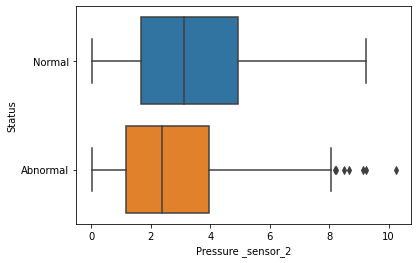

In [45]:
sns.boxplot(x='Pressure _sensor_2', y='Status', data=df2)

<AxesSubplot:xlabel='Pressure _sensor_3', ylabel='Status'>

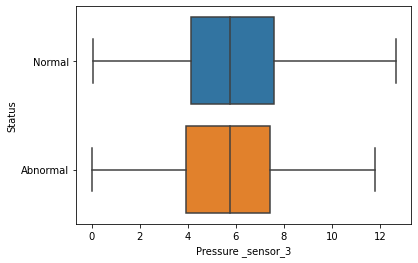

In [46]:
sns.boxplot(x='Pressure _sensor_3', y='Status', data=df2)

<AxesSubplot:xlabel='Pressure _sensor_4', ylabel='Status'>

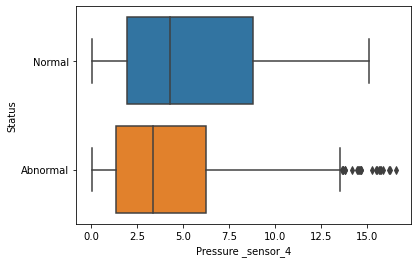

In [47]:
sns.boxplot(x='Pressure _sensor_4', y='Status', data=df2)

<AxesSubplot:xlabel='Vibration_sensor_1', ylabel='Status'>

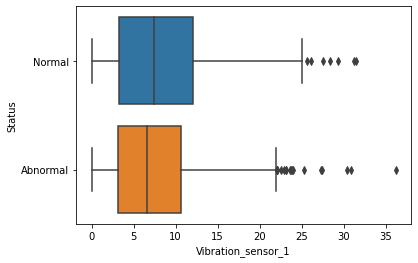

In [48]:
sns.boxplot(x='Vibration_sensor_1', y='Status', data=df2)

<AxesSubplot:xlabel='Vibration_sensor_2', ylabel='Status'>

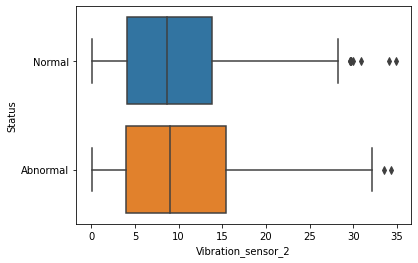

In [49]:
sns.boxplot(x='Vibration_sensor_2', y='Status', data=df2)

<AxesSubplot:xlabel='Vibration_sensor_3', ylabel='Status'>

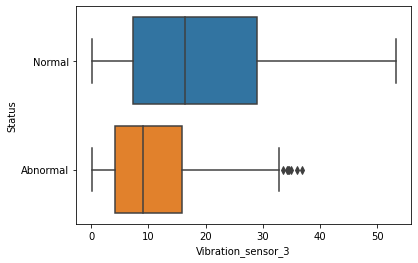

In [50]:
sns.boxplot(x='Vibration_sensor_3', y='Status', data=df2)

<AxesSubplot:xlabel='Vibration_sensor_4', ylabel='Status'>

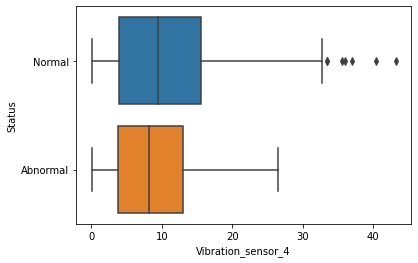

In [51]:
sns.boxplot(x='Vibration_sensor_4', y='Status', data=df2)

In [52]:
df2.corr()

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Power_range_sensor_1,1.000000,0.095235,0.229943,0.499795,0.047805,0.652081,0.199811,0.406382,-0.152247,-0.003684,0.106583,0.014177
Power_range_sensor_2,0.095235,1.000000,0.693818,0.228438,-0.222160,0.112438,0.583086,0.136380,-0.119142,0.011013,0.243242,0.058244
Power_range_sensor_3,0.229943,0.693818,1.000000,0.083362,-0.255865,0.166549,0.362688,0.062479,-0.249057,-0.038320,0.215811,-0.023962
Power_range_sensor_4,0.499795,0.228438,0.083362,1.000000,0.150635,0.567705,-0.070547,0.823637,-0.114117,0.043383,0.330499,-0.018193
Pressure _sensor_1,0.047805,-0.222160,-0.255865,0.150635,1.000000,0.116859,-0.118713,0.131136,0.101438,-0.035196,-0.084575,-0.125128
Pressure _sensor_2,0.652081,0.112438,0.166549,0.567705,0.116859,1.000000,0.091341,0.571403,-0.099950,-0.027698,0.011015,0.001189
Pressure _sensor_3,0.199811,0.583086,0.362688,-0.070547,-0.118713,0.091341,1.000000,0.001591,0.016497,0.029766,0.019993,0.105642
Pressure _sensor_4,0.406382,0.136380,0.062479,0.823637,0.131136,0.571403,0.001591,1.000000,-0.112696,0.010560,0.191842,0.047000
Vibration_sensor_1,-0.152247,-0.119142,-0.249057,-0.114117,0.101438,-0.099950,0.016497,-0.112696,1.000000,-0.045857,-0.076277,0.026480
Vibration_sensor_2,-0.003684,0.011013,-0.038320,0.043383,-0.035196,-0.027698,0.029766,0.010560,-0.045857,1.000000,0.103704,-0.023290


In [53]:
import math
shuffled = df2.sample(frac=1)
totalSize = len(shuffled)
trainSize = math.floor(0.7*totalSize)

train = df2.head(trainSize)
test = df2.tail(len(shuffled) - trainSize)

In [54]:
train.count()

Status                   697
Power_range_sensor_1     697
Power_range_sensor_2     697
Power_range_sensor_3     697
Power_range_sensor_4     697
Pressure _sensor_1       697
Pressure _sensor_2       697
Pressure _sensor_3       697
Pressure _sensor_4       697
Vibration_sensor_1       697
Vibration_sensor_2       697
Vibration_sensor_3       697
Vibration_sensor_4       697
dtype: int64

In [55]:
test.count()

Status                   299
Power_range_sensor_1     299
Power_range_sensor_2     299
Power_range_sensor_3     299
Power_range_sensor_4     299
Pressure _sensor_1       299
Pressure _sensor_2       299
Pressure _sensor_3       299
Pressure _sensor_4       299
Vibration_sensor_1       299
Vibration_sensor_2       299
Vibration_sensor_3       299
Vibration_sensor_4       299
dtype: int64

In [56]:
train.groupby('Status').count()

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Status,,,,,,,,,,,,
Abnormal,199,199,199,199,199,199,199,199,199,199,199,199
Normal,498,498,498,498,498,498,498,498,498,498,498,498


In [57]:
test.groupby("Status").count()

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
Status,,,,,,,,,,,,
Abnormal,299,299,299,299,299,299,299,299,299,299,299,299


In [56]:
from sklearn.metrics import confusion_matrix

X = df2[['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3 ', 'Power_range_sensor_4', 'Pressure _sensor_1', 'Pressure _sensor_2', 'Pressure _sensor_3', 'Pressure _sensor_4', 'Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4']].values

In [57]:
from sklearn import preprocessing

y = df2["Status"]

y[0:5]

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Status, dtype: object

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(697, 12)
(299, 12)
(697,)
(299,)


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

statusTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

statusTree.fit(X_train, y_train)
predicted = statusTree.predict(X_test)
predicted

array(['Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Nor

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

print(specificity)
print(sensitivity)

In [71]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf').fit(X_train, y_train)

In [72]:
predicted2 = clf.predict(X_test)
predicted2

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal',
  

In [73]:
print("\nAccuracy: ", metrics.accuracy_score(y_test, predicted2))


Accuracy:  0.7692307692307693


In [75]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, predicted2).ravel()
specificity2 = tn2 / (tn2+fp2)
sensitivity2 = tp2 / (tp2+fn2)

print(specificity2)
print(sensitivity2)

0.8051948051948052
0.7310344827586207


In [83]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver= 'adam', max_iter=3000)
mlp.fit(X_train, y_train)

predicted3 = mlp.predict(X_test)
predicted3

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',


In [84]:
print("\nAccuracy: ", metrics.accuracy_score(y_test, predicted3))


Accuracy:  0.7993311036789298


In [87]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, predicted3).ravel()
specificity3 = tn3 / (tn3+fp3)
sensitivity3 = tp3 / (tp3+fn3)

print(specificity3)
print(sensitivity3)

0.7532467532467533
0.8482758620689655


,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Normal,2.093555,2.022642,6.002677,2.856402,9.501442,1.546302,2.173466,2.524177,5.259978,5.837257,8.931337,7.278084
1,Normal,9.706578,9.536684,12.143560,13.097169,45.422534,7.368119,10.118576,12.070053,25.162983,27.858310,42.540591,34.550579
2,Normal,2.962976,2.880759,6.703977,4.025916,13.603696,2.211164,3.080812,3.614333,7.532937,8.352101,12.769575,10.392652
3,Normal,11.267591,11.077401,13.402718,15.196987,52.787976,8.561853,11.747681,14.027387,29.243996,32.373617,49.432002,40.142668
4,Normal,2.717839,2.638809,6.506243,3.696167,12.447048,2.023703,2.824982,3.306959,6.892067,7.643031,11.687368,9.514487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Normal,8.511451,8.357095,11.179536,11.489526,39.783476,6.454183,8.871316,10.571497,22.038518,24.401344,37.264456,30.269217
999996,Normal,4.445431,4.343940,7.899768,6.020062,20.598473,3.344824,4.627932,5.473165,11.408573,12.640177,19.314177,15.703321
999997,Normal,7.124611,6.988287,10.060872,9.623999,33.239848,5.393642,7.423981,8.832556,18.412852,20.389841,31.141968,25.301076
999998,Normal,3.818536,3.725195,7.394096,5.176785,17.640548,2.865426,3.973692,4.687109,9.769658,10.826851,16.546619,13.457565
